In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import r2_score
from keras import callbacks
import pickle

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/HistoricalQuotes.csv", index_col = 'Date', parse_dates = True)

In [ ]:
data.rename(columns = {' Close/Last' : 'Close', ' Volume' : 'Volume', ' Open' : 'Open', ' High' : 'High', ' Low' : 'Low'}, inplace = True)

In [ ]:
data.head(5)

,Close,Volume,Open,High,Low
Date,,,,,
2020-02-28,$273.36,106721200,$257.26,$278.41,$256.37
2020-02-27,$273.52,80151380,$281.1,$286,$272.96
2020-02-26,$292.65,49678430,$286.53,$297.88,$286.5
2020-02-25,$288.08,57668360,$300.95,$302.53,$286.13
2020-02-24,$298.18,55548830,$297.26,$304.18,$289.23


In [ ]:
def convert(x):
  y = x[2:]
  return float(y)

In [ ]:
data['Close'] = data['Close'].apply(convert)
data['Open'] = data['Open'].apply(convert)
data['High'] = data['High'].apply(convert)
data['Low'] = data['Low'].apply(convert)

In [ ]:
data.head(5)

,Close,Volume,Open,High,Low
Date,,,,,
2020-02-28,273.36,106721200,257.26,278.41,256.37
2020-02-27,273.52,80151380,281.10,286.00,272.96
2020-02-26,292.65,49678430,286.53,297.88,286.50
2020-02-25,288.08,57668360,300.95,302.53,286.13
2020-02-24,298.18,55548830,297.26,304.18,289.23


array([[<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>]], dtype=object)

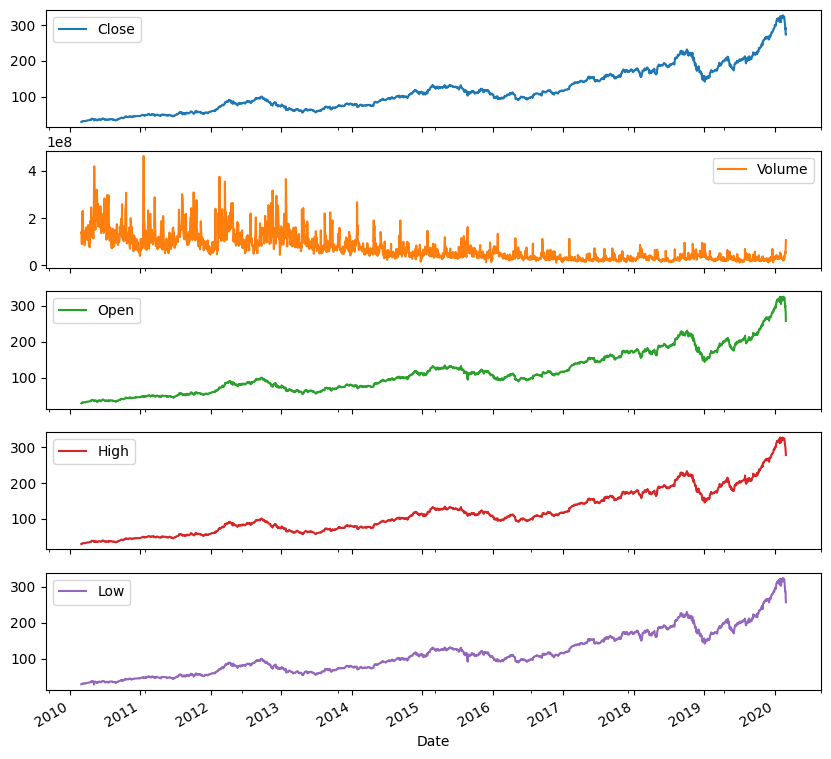

In [ ]:
data.plot(subplots = True, layout = (5,1), figsize = (10, 10))

In [ ]:
len = data.shape[0]
end = int(0.8 * len)
len

2518

In [ ]:
newdata = data.iloc[:, 0]

In [ ]:
X_train, y_train, X_test, y_test = [], [], [] , []

In [ ]:
T = 10

In [ ]:
for i in range(end):
  X_train.append(newdata[i:i+T])
  y_train.append(newdata[i+T])
X_train, y_train = np.array(X_train).reshape(end, T, 1), np.array(y_train).reshape(-1, 1)

In [ ]:
for i in range(end - T, len - T):
  X_test.append(newdata[i:i+T])
  y_test.append(newdata[i+T])
X_test, y_test = np.array(X_test).reshape(len-end, T, 1), np.array(y_test).reshape(-1, 1)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2014, 10, 1) (2014, 1) (504, 10, 1) (504, 1)


In [ ]:
N = X_train.shape[2]
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, activation = 'relu', input_shape = (T,N)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(64, activation = 'linear'))
model.add(Dense(32, activation = 'linear'))
model.add(Dense(1, activation = 'relu'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [ ]:
callback = callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights = True)

In [ ]:
model.fit(X_train, y_train, epochs = 50, batch_size = 32, callbacks = [callback])

Epoch 1/50
63/63 [==============================] - 7s 45ms/step - loss: 3337.9995 - accuracy: 0.0000e+00
Epoch 2/50
63/63 [==============================] - 4s 63ms/step - loss: 24.5251 - accuracy: 0.0000e+00
Epoch 3/50
63/63 [==============================] - 2s 36ms/step - loss: 16.4884 - accuracy: 0.0000e+00
Epoch 4/50
63/63 [==============================] - 2s 37ms/step - loss: 13.3517 - accuracy: 0.0000e+00
Epoch 5/50
63/63 [==============================] - 2s 38ms/step - loss: 10.4358 - accuracy: 0.0000e+00
Epoch 6/50
63/63 [==============================] - 2s 40ms/step - loss: 13.3678 - accuracy: 0.0000e+00
Epoch 7/50
63/63 [==============================] - 4s 66ms/step - loss: 12.1074 - accuracy: 0.0000e+00
Epoch 8/50
63/63 [==============================] - 2s 38ms/step - loss: 8.7318 - accuracy: 0.0000e+00
Epoch 9/50
63/63 [==============================] - 2s 38ms/step - loss: 8.3401 - accuracy: 0.0000e+00
Epoch 10/50
63/63 [==============================] - 2s 37ms/ste

In [ ]:
predict_x=model.predict(X_test) 
for i in range(predict_x.shape[0]):
    print(predict_x[i], y_test[i])

16/16 [==============================] - 0s 5ms/step
[77.352455] [75.1085]
[75.94227] [74.63]
[75.08634] [73.77]
[74.40899] [73.2914]
[73.88855] [73.55]
[74.028114] [71.7314]
[73.11594] [71.7443]
[72.34584] [71.0957]
[71.99495] [72.78]
[72.89755] [71.8]
[72.945244] [70.4886]
[71.65265] [70.4528]
[70.99778] [68.0971]
[69.60454] [66.9757]
[67.892426] [66.2814]
[66.93813] [65.6686]
[66.43461] [65.0171]
[65.9364] [65.17]
[65.819954] [65.2114]
[65.9996] [64.7157]
[65.80364] [63.8971]
[65.1265] [63.5186]
[64.43601] [63.8086]
[64.3883] [60.0586]
[62.833496] [61.0584]
[61.181767] [60.0428]
[61.226246] [61.1071]
[61.42658] [61.3014]
[62.14119] [60.6714]
[62.013577] [59.9728]
[61.32976] [60.1986]
[61.027298] [60.3643]
[61.193096] [60.4628]
[61.28469] [60.2471]
[61.26235] [60.3428]
[61.193874] [59.7186]
[60.93883] [59.0628]
[60.32012] [58.7471]
[59.79848] [57.8571]
[59.222385] [57.8743]
[58.81586] [57.52]
[58.682384] [58.0757]
[58.82563] [57.6186]
[58.911987] [56.9357]
[58.425335] [56.635]
[57.89

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(predict_x, y_test)

0.9694473043459817

In [ ]:
test = pd.DataFrame(y_test)
test['pred'] = predict_x

In [50]:
test.rename(columns = {0 : 'actual', 'pred' : 'predicted'}, inplace = True)
test

,actual,predicted
0,75.1085,77.352455
1,74.6300,75.942268
2,73.7700,75.086342
3,73.2914,74.408989
4,73.5500,73.888550
...,...,...
499,31.2786,31.833920
500,30.1014,31.612318
501,29.9043,31.152836
502,29.8357,30.621761


<Axes: >

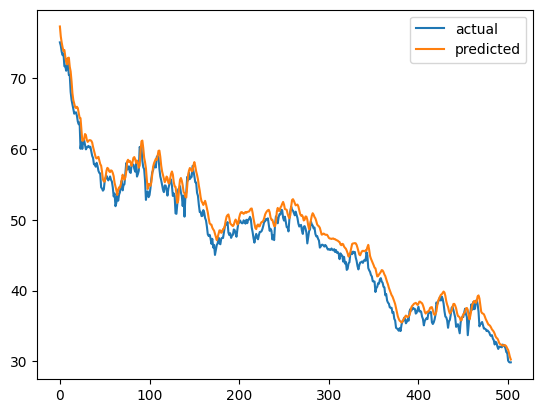

In [51]:
test.plot()

In [ ]:
filename = 'model_pickle_apple_lstm.sav'
pickle.dump(model, open(filename, 'wb'))